done
Delta:  44.315632083004246 Theta:  0.1
Run:  0


C:\Users\jarvi\amp_qgt.ipynb:195: RuntimeWarning: invalid value encountered in double_scalars
  "        #print(tau_2)\n",
C:\Users\jarvi\AppData\Local\Temp\ipykernel_9132\931235213.py:72: RuntimeWarning: invalid value encountered in double_scalars
  norm_correl = (np.dot(beta, beta_0)/(np.linalg.norm(beta)*np.linalg.norm(beta_0)))**2


Run:  25
Run:  50
Run:  75
2.1510740873653097e-09 0.9999999999999996 0.9999994222654071 0.0037232911332721382
Delta:  29.71911078755883 Theta:  0.14350000000000002
Run:  0
Run:  25
Run:  50
Run:  75
2.811655274764096e-09 1.0000000000000004 0.9999994237248648 0.004879015426689707
Delta:  21.115257500845363 Theta:  0.187
Run:  0
Run:  25
Run:  50
Run:  75
3.678903335018081e-09 0.01733703208579037 0.99999942458525 0.00639348111168406
Delta:  16.11354836051341 Theta:  0.2305
Run:  0
Run:  25
Run:  50
Run:  75
4.816659028496373e-09 1.0 0.9999994250854208 0.008378042935026052
Delta:  13.207488018645023 Theta:  0.274
Run:  0
Run:  25
Run:  50
Run:  75
6.308578584712093e-09 0.9999999999999996 0.999999425376027 0.010978620597293246
Delta:  10.4264937447353 Theta:  0.3175
Run:  0
Run:  25
Run:  50
Run:  75
8.262785470219538e-09 0.9999999999999996 0.9999994256541266 0.014386427851236205
Delta:  8.75237217910424 Theta:  0.361
Run:  0
Run:  25
Run:  50
Run:  75
1.0824429568673601e-08 0.999999999999

0.29051333924353073 100 0.7056474602295393 500 0.9439
0.24837215564355955 100 0.7448499994721416 500 0.9525999999999999
0.19714321618611313 100 0.7862304521484127 500 0.9612999999999999
0.1506187757026207 100 0.829909813148382 500 0.97


C:\Users\jarvi\anaconda3\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
C:\Users\jarvi\anaconda3\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


Text(0.5, 0, '$\\theta$')

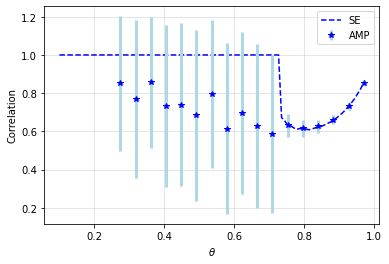

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon Nov  6 14:56:53 2023

@author: pp423
"""
%load_ext autoreload
%autoreload 2

import numpy as np
import tikzplotlib
import matplotlib.pyplot as plt
from ipynb.fs.full.amp_qgt import sub_amp_bayes, amp_bayes, create_beta, Xiid_to_Xtilde, y_iid_to_y_iid_tilde
from ipynb.fs.full.se_qgt import state_ev_iid_disc, state_ev_iid_disc_sub
from numpy.random import binomial

#----------------Figure 6a------------------------------------------------------
theta = 0.8
#number of subjects
p = 500
# defective chance
noise = 0

run_no = 100


theta_array = np.linspace(0.1, 0.97, num=21)

se_theta_array = np.linspace(0.1, 0.97, num=101)

nc_array_av = []
nc_array_std = []
se_nc_array = []


for theta in theta_array:
    nu = p**(theta-1)
    ITL = int(2*(1-theta)/theta*p**theta)
    ITL2= int((1+np.sqrt(theta))/(1 - np.sqrt(theta))*2*(1-theta)/theta*p**theta)
    delta = 2.5*ITL/(nu*p)
    #defective chance
    
    print("Delta: ", delta, "Theta: ", theta)
    #number of tests
    n = int(delta*nu*p)
    
    mse_runs = []
    nc_runs = []
    
    #IID
    for run in range(run_no):
        beta_0 = create_beta(nu, p)
    
        t = 100
        #chance of inclusion in a test
        alpha = 0.5
        if(run % 25 ==0):
            print("Run: ", run)
            
        X = binomial(1, alpha, (n,p))
        y = np.dot(X, beta_0)
        
        #AMP
        X_tilde = Xiid_to_Xtilde(X, alpha)
        
        defect_no = np.sum(beta_0)
        
        y_tilde = y_iid_to_y_iid_tilde(y, alpha, nu, n, p, defect_no)
        X_tilde_T = np.transpose(X_tilde)
        beta, mse_pred, tau_array, error_norm_array, nc_array = sub_amp_bayes(X_tilde, X_tilde_T, y_tilde, t, nu, beta_0, theta, delta)
        norm_correl = (np.dot(beta, beta_0)/(np.linalg.norm(beta)*np.linalg.norm(beta_0)))**2
        
        nc_runs.append(norm_correl)
        
    print(mse_pred, norm_correl, 1-(mse_pred/nu), nu)
    nc_array_av.append(np.average(nc_runs))
    nc_array_std.append(np.std(nc_runs))
    
for theta in se_theta_array: 
    nu = p**(theta-1)
    ITL = int(2*(1-theta)/theta*p**theta)
    delta = 2.5*ITL/(nu*p)
    

    print(delta,t,nu,p,theta)
    #IID STATE EVOLUTION
    tau, mse_pred, nc_pred, _ = state_ev_iid_disc_sub(delta, t, nu, p,  theta)
    se_nc_array.append(nc_pred)
    
    
plt.figure()
plt.plot(se_theta_array, se_nc_array, label=r'SE', color = 'blue', linestyle = 'dashed')
plt.errorbar(theta_array, nc_array_av, yerr=nc_array_std, label =r"AMP", fmt='*', color='blue',ecolor='lightblue', elinewidth=3, capsize=0)
plt.grid(alpha=0.4)
plt.legend()
plt.ylabel('Correlation')
plt.xlabel(r'$\theta$')
#tikzplotlib.save("pool_fig6a.tex")

